In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
D = np.array([
    [0.26, 0.22, 0.14],
    [0.20, 0.40, 0.80],
    [1.60, 1.20, 0.40],
    [0.12, 0.14, 0.18]
])

In [10]:
C = np.matmul(D.T, D)
C

array([[2.682, 2.074, 0.858],
       [2.074, 1.668, 0.856],
       [0.858, 0.856, 0.852]])

In [19]:
# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)
eigenvalues

array([4.68805558e+00, 6.77818341e-16, 5.13944419e-01])

In [20]:
eigenvectors

array([[-0.74470422, -0.53452248, -0.3996265 ],
       [-0.59634908,  0.80178373,  0.03886691],
       [-0.29963878, -0.26726124,  0.91585372]])

In [24]:
# Round-off errors
selected_eigenvalues = eigenvalues[eigenvalues > 1e-8]
selected_eigenvalues = np.append(selected_eigenvalues, 0)
selected_eigenvalues

array([4.68805558, 0.51394442, 0.        ])

In [27]:
selected_eigenvectors = eigenvectors[:, eigenvalues > 1e-8]
selected_eigenvectors = np.append(selected_eigenvectors, np.array([[0, 0, 0]]).T, axis=1)
selected_eigenvectors

array([[-0.74470422, -0.3996265 ,  0.        ],
       [-0.59634908,  0.03886691,  0.        ],
       [-0.29963878,  0.91585372,  0.        ]])

Dari paper:
$$
\begin{bmatrix}
    0.745 & -0.400 & 0\\
    0.596 & 0.039 & 0\\
    0.300 & 0.916 & 0\\
\end{bmatrix}
$$
Eigenvektor pertama hanya berbeda tanda

In [28]:
# Change first eigenvector to positive
selected_eigenvectors[:, 0] = -selected_eigenvectors[:, 0]
selected_eigenvectors

array([[ 0.74470422, -0.3996265 ,  0.        ],
       [ 0.59634908,  0.03886691,  0.        ],
       [ 0.29963878,  0.91585372,  0.        ]])

In [38]:
E_acc = selected_eigenvectors[:, :2].copy()

In [39]:
A = np.matmul(D, E_acc)
A

array([[ 0.36676932,  0.03286735],
       [ 0.6271915 ,  0.66830444],
       [ 2.02700116, -0.22642062],
       [ 0.22678836,  0.12233986]])

In [40]:
ratio_of_A1_and_A2 = A[:, 0] / A[:, 1]
ratio_of_A1_and_A2

array([11.15907773,  0.93848173, -8.95237007,  1.85375695])

In [41]:
cross_A1_and_A2 = A[:, 0] * A[:, 1]
cross_A1_and_A2

array([ 0.01205474,  0.41915486, -0.45895485,  0.02774526])

In [44]:
# Line passing through eigenvector 1 and 2
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(E_acc[:, 0].reshape(-1,1), E_acc[:, 1])
reg.coef_, reg.intercept_

(array([-2.95570067]), 1.8014962704416984)

In [45]:
def E_2(E_1):
    return reg.coef_ * E_1 + reg.intercept_

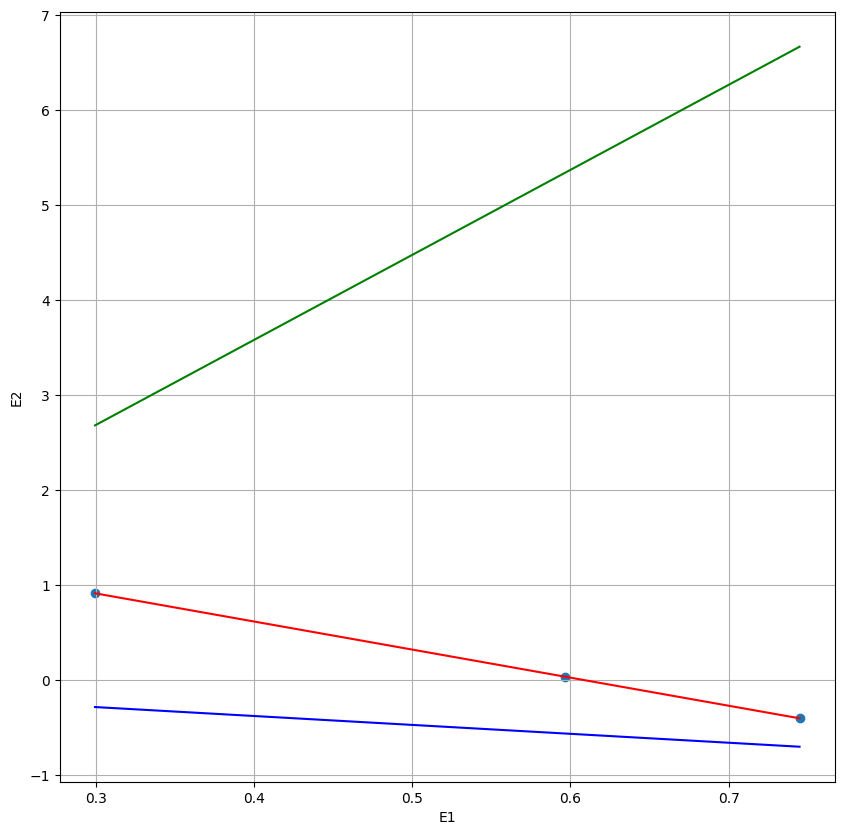

In [53]:
def limit_1(E_1):
    return 8.952 * E_1

def limit_2(E_1):
    return -0.938 * E_1

x = np.linspace(min(E_acc[:, 0]), max(E_acc[:, 0]), 100)
# Plot
plt.figure(figsize=(10, 10))
plt.scatter(E_acc[:, 0], E_acc[:, 1])
plt.plot(x, E_2(x), color='red')
plt.plot(x, limit_1(x), color='green')
plt.plot(x, limit_2(x), color='blue')
plt.xlabel('E1')
plt.ylabel('E2')
plt.grid()
plt.show()

In [51]:
ratio_of_A1_and_A2

array([11.15907773,  0.93848173, -8.95237007,  1.85375695])

In [52]:
reg.coef_, reg.intercept_

(array([-2.95570067]), 1.8014962704416984)

Solve:
- $E_2 = -2.956 E_1 + 1.801$
- $E_2 = 8.952 E_1$
- $E_2 = -0.938 E_1$

$$
E_2 = \begin{bmatrix}
    -2.956 \\
    8.952 \\
    -0.938 \\
\end{bmatrix} E_1 + 
\begin{bmatrix}
    1.801 \\
    0 \\
    0 \\
\end{bmatrix}
$$

$$
\begin{bmatrix}
    2.956 & 1 \\
    -8.952 & 1 \\
    0.938 & 1 \\
\end{bmatrix} 

\begin{bmatrix}
    E_1 \\
    E_2 \\
\end{bmatrix} = 

\begin{bmatrix}
    1.801 \\
    0 \\
    0 \\
\end{bmatrix}
$$

In [63]:
A_T_1 = np.array([
    [2.956, 1],
    [-8.952, 1],
])
b_T_1 = np.array([1.801, 0])

A_T_2 = np.array([
    [2.956, 1],
    [0.938, 1],
])
b_T_2 = np.array([1.801, 0])

T_1 = np.linalg.solve(A_T_1, b_T_1)
T_2 = np.linalg.solve(A_T_2, b_T_2)

T = np.concatenate((T_1.reshape(2, 1), T_2.reshape(2, 1)), axis=1)
T

array([[ 0.15124286,  0.89246779],
       [ 1.3539261 , -0.83713479]])

In [65]:
P = np.matmul(A, T)
P

array([[9.99712066e-02, 2.99815405e-01],
       [9.99693057e-01, 2.87322331e-04],
       [1.26728411e-05, 1.99857782e+00],
       [1.99939245e-01, 9.99863555e-02]])

In [67]:
K = np.matmul(np.linalg.inv(T), E_acc.T)
K

array([[0.19983132, 0.39995025, 0.80018811],
       [0.80056801, 0.60042442, 0.20013725]])